<a href="https://colab.research.google.com/github/Ayushmaan-0412/Predicting-Inflation-/blob/main/China_CPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Value
TIME,
1986-01-01,26.000000
1987-01-01,27.900000
1988-01-01,33.200000
1989-01-01,39.200000
1990-01-01,40.440263
1991-01-01,41.878596
1992-01-01,44.539554
1993-01-01,51.046818
1994-01-01,63.429240


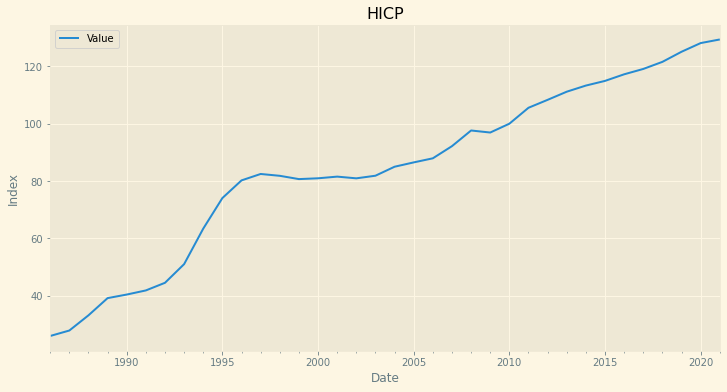

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('Solarize_Light2')
from pylab import rcParams


from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import cufflinks
df = pd.read_csv('Final1.csv')
df=df.dropna()
df.rename(columns = {'Date':'TIME','CPI':'Value'}, inplace = True)
df.drop(['Year'], inplace=True, axis=1)
df['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df['TIME'] =  pd.to_datetime(df['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df = df.set_index(['TIME'])

df['Value'] = pd.to_numeric(df['Value'],errors = 'coerce')
rcParams['figure.figsize'] = 12, 6
df.plot()
plt.xlabel('Date')
plt.ylabel('Index')
plt.title("HICP")
df

In [ ]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

testStationarity(df.Value)


Test Statistic                 -1.992958
p-value                         0.289669
#Lags Used                      4.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64

Test parameters : -4.552925123731095
p-value : 0.00015759011487441905
#Lags Used : 9
Dataset observations : 24
Dataset is stationary


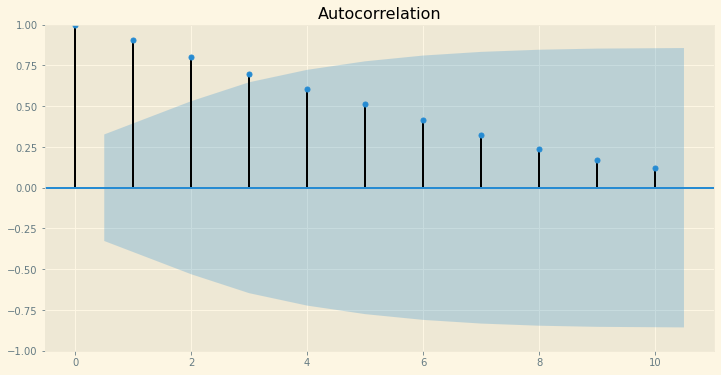

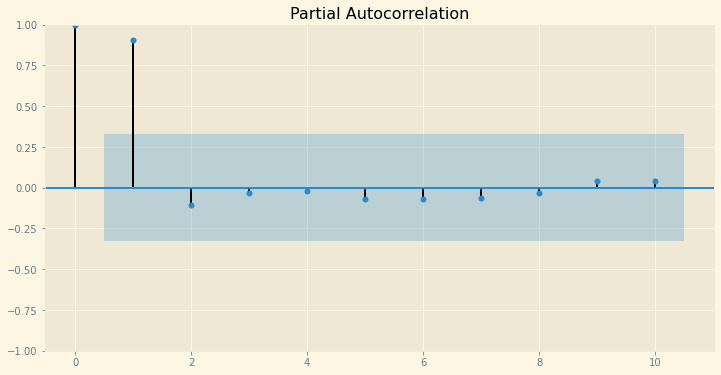

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
df=df.dropna()
#df['Differencing'] #new dataset
#calculate autocorrelations
sm.tsa.acf(df['Value'])
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(df['Value'], lags=10)
plt.show()
sm.graphics.tsa.plot_pacf(df['Value'], lags=10, method="ywm")
plt.show()



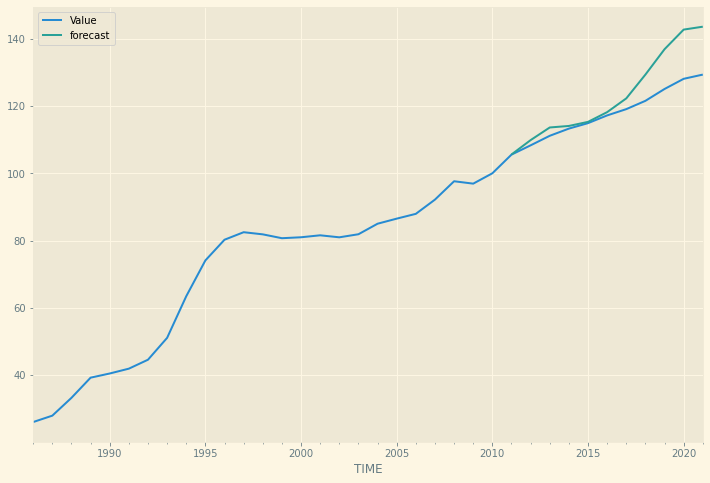

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
sarima_model=model.fit()
df['forecast']=sarima_model.predict(start=25,end=100,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [ ]:
from pmdarima.arima import auto_arima

results = auto_arima(df['Value'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.83 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=130.096, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=120.677, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=120.420, Time=0.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=120.668, Time=0.56 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.20 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=120.861, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=117.711, Time=0.16 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=117.075, Time=0.36 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=118.962, Time=3.44 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=119.047, Time=1.48 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=120.963, Time=5.32 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=116.241, Time=0.41 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=11

In [ ]:
results.aic()

116.24119305153587

In [ ]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df['Value'],
                                order=(0,1 ,1 ),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Value   No. Observations:                   36
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -55.121
Date:                             Fri, 10 Feb 2023   AIC                            116.241
Time:                                     12:15:21   BIC                            119.648
Sample:                                 01-01-1986   HQIC                           117.098
                                      - 01-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0666      0.395      2.700      0.007       0.292       1.841
ar.S.L12      -0.5000      

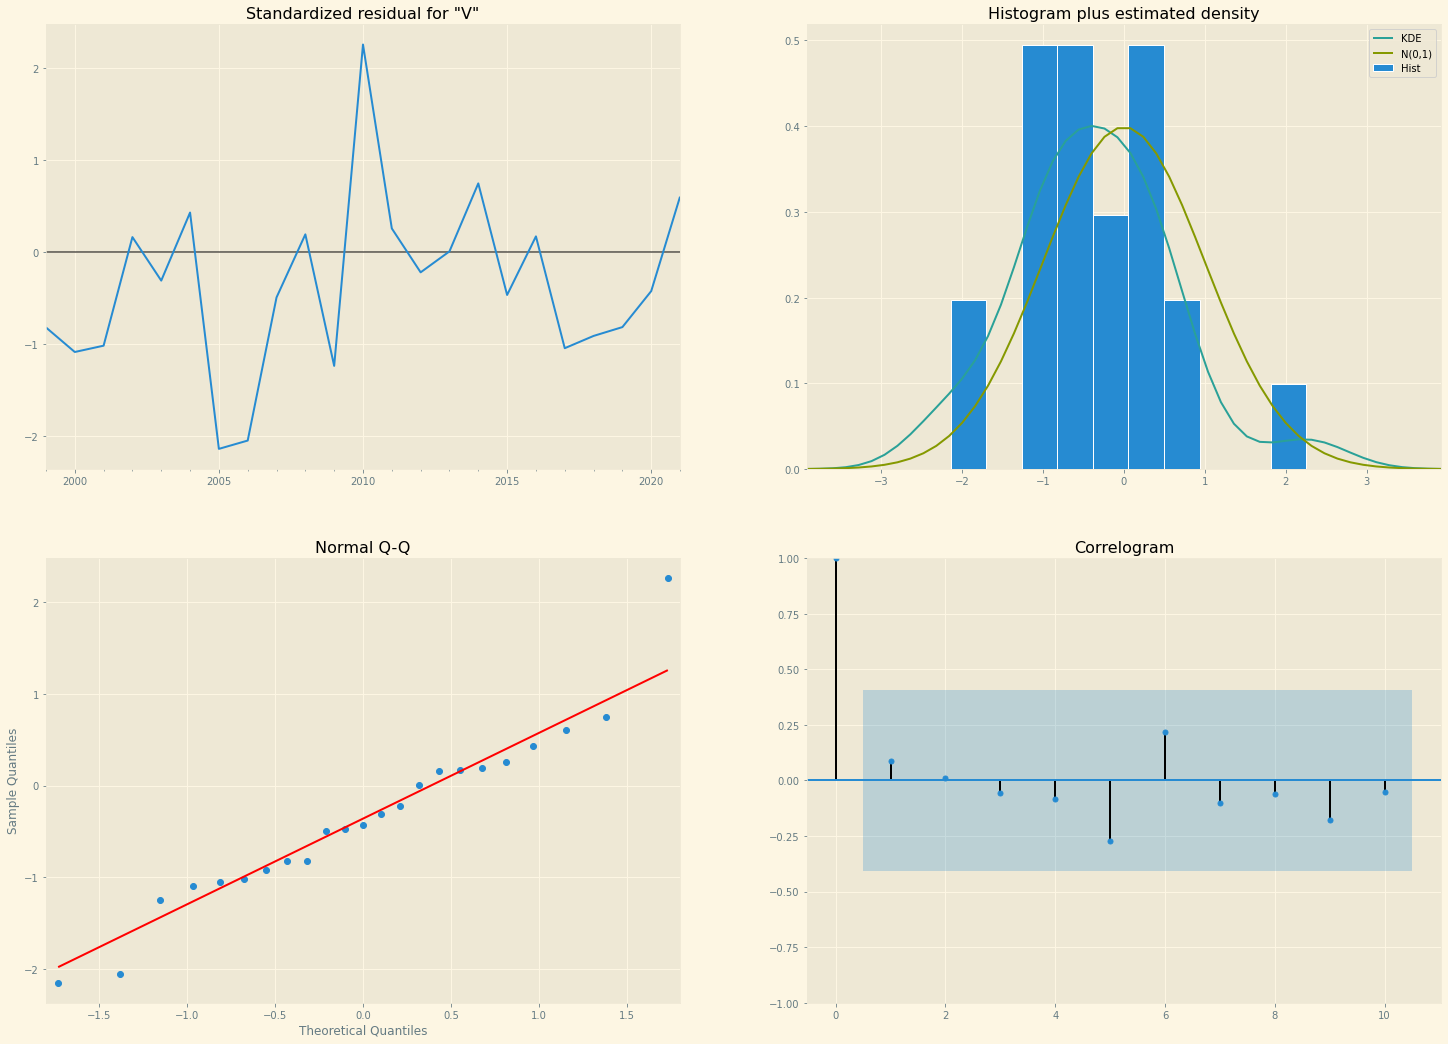

In [ ]:
results.plot_diagnostics(figsize=(25,18))
plt.show()

In [ ]:
import statsmodels.api as sm
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci['Predicted'] = (pred_ci['lower Value'] + pred_ci['upper Value'])/2
pred_ci['Observed'] = df['Value']
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
display(pred_ci.tail)

<bound method NDFrame.tail of             lower Value  upper Value   Predicted    Observed  Diff, %%
2019-01-01   122.373209   131.680722  127.026966  125.083154  1.554015
2020-01-01   124.476890   133.765565  129.121228  128.109444  0.789781
2021-01-01   123.309388   132.582319  127.945853  129.366217 -1.097940>

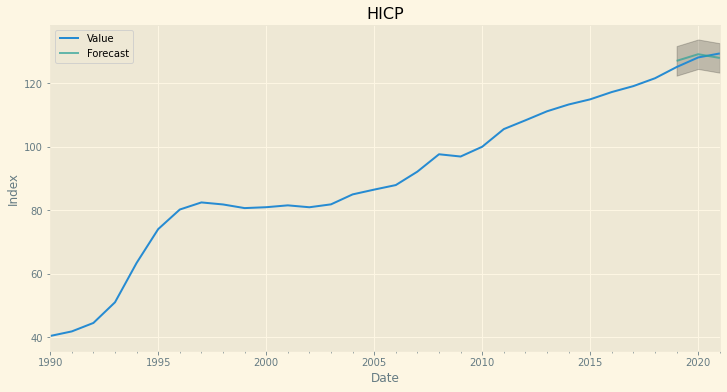

In [ ]:
ax = df['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('Index')
plt.title("HICP")
plt.legend()
rcParams['figure.figsize'] = 12, 10
plt.show()

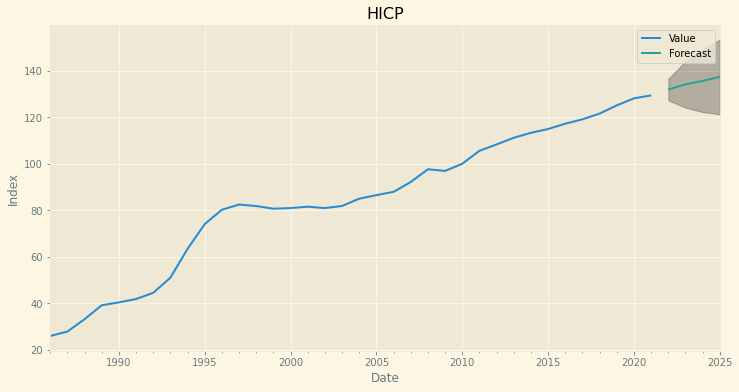

,lower Value,upper Value
2022-01-01,127.260732,136.520409
2023-01-01,124.070060,144.118185
2024-01-01,122.218158,149.015789
2025-01-01,121.247420,153.407936


In [ ]:
# Get forecast 3 years ahead in future
pred_uc = results.get_forecast(steps=4)
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title("HICP")

plt.legend()
plt.show()
display(pred_ci)


Text(0.5, 1.0, 'HICP')

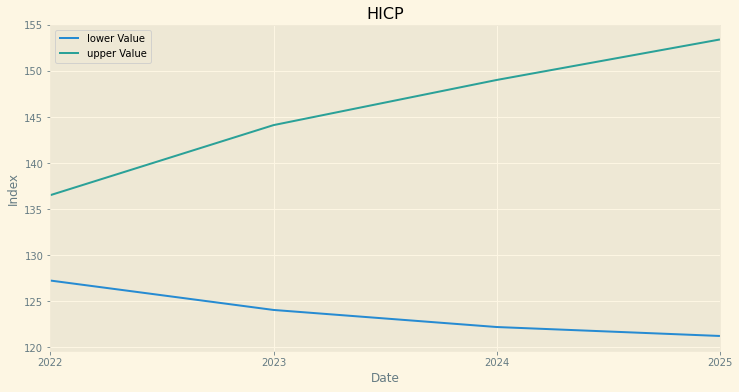

In [ ]:
rcParams['figure.figsize'] = 12, 6
pred_ci.head(11).plot()
plt.xlabel('Date')
plt.ylabel('Index')
plt.title("HICP")

In [ ]:
pred_ci['Mean'] = (pred_ci['lower Value'] + pred_ci['upper Value'])/2

In [ ]:
display(pred_ci['Mean'])

2022-01-01    131.890570
2023-01-01    134.094123
2024-01-01    135.616973
2025-01-01    137.327678
Freq: AS-JAN, Name: Mean, dtype: float64

Text(0.5, 1.0, 'HICP')

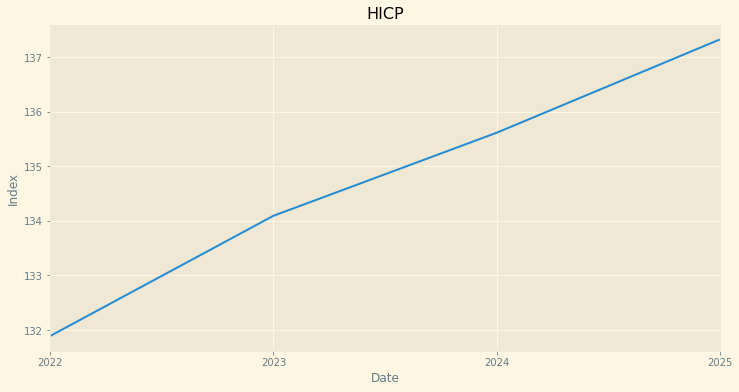

In [ ]:
rcParams['figure.figsize'] = 12, 6
pred_ci['Mean'].head(11).plot()
plt.xlabel('Date')
plt.ylabel('Index')
plt.title("HICP")

                     HICP predicted monthly and annual rates of change Jan 2023 to Dec 2023 


Text(0, 0.5, 'HICP annual rate of change')

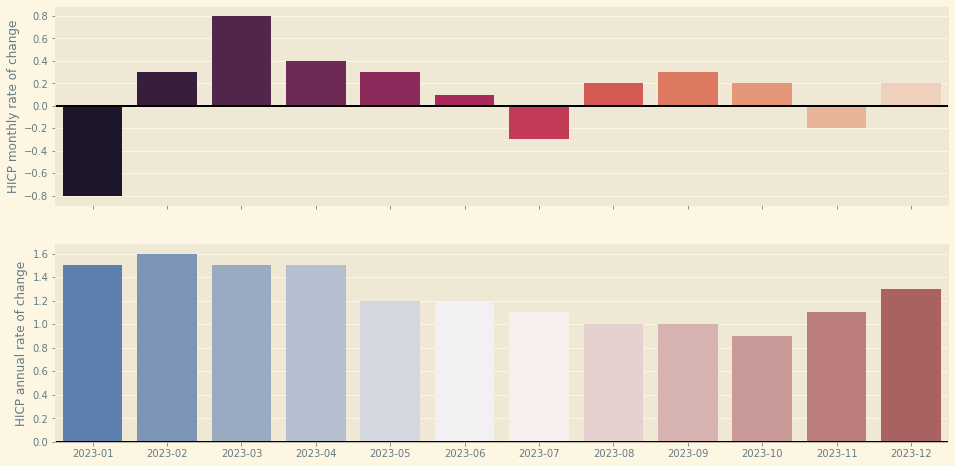

In [ ]:
import seaborn as sns

print("                     HICP predicted monthly and annual rates of change Jan 2023 to Dec 2023 ")
monthly_roc = [-0.8, 0.3, 0.8, 0.4, 0.3, 0.1, -0.3, 0.2, 0.3, 0.2, -0.2, 0.2]
annual_roc = [1.5, 1.6, 1.5, 1.5, 1.2, 1.2, 1.1, 1, 1, 0.9, 1.1, 1.3]
index = ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12']


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Generate some sequential data
sns.barplot(x=index, y=monthly_roc, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("HICP monthly rate of change")

# Center the data to make it diverging

sns.barplot(x=index, y=annual_roc, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("HICP annual rate of change")